# Group Project 

## Data Set: MLF_GP2_EconCycle

In [4]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statistics 
# Model Packages 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [5]:
# Import dataset
df = pd.read_csv("MLF_GP2_EconCycle.csv")
# Drop row with missing data
df = df.dropna()
# Remove date columnmn(Now have 16 variables)
del df['Date']

## 1) Introduction/Exploratory Data Analysis

(223, 16)
   T1Y Index  T2Y Index  T3Y Index  T5Y Index  T7Y Index  T10Y Index  CP1M  \
0      10.41       9.86       9.50       9.20       9.14        9.10  9.75   
1      10.24       9.72       9.29       9.13       9.11        9.10  9.74   
2      10.25       9.79       9.38       9.20       9.15        9.12  9.72   
3      10.12       9.78       9.43       9.25       9.21        9.18  9.86   
4      10.12       9.78       9.42       9.24       9.23        9.25  9.77   

   CP3M   CP6M  CP1M_T1Y  CP3M_T1Y  CP6M_T1Y  USPHCI  PCT 3MO FWD  \
0  9.95  10.01  0.936599  0.955812  0.961575   47.08     0.011470   
1  9.90   9.96  0.951172  0.966797  0.972656   47.32     0.009298   
2  9.85   9.87  0.948293  0.960976  0.962927   47.39     0.010340   
3  9.95   9.98  0.974308  0.983202  0.986166   47.62     0.006720   
4  9.76   9.71  0.965415  0.964427  0.959486   47.76     0.005653   

   PCT 6MO FWD  PCT 9MO FWD  
0     0.018060     0.024406  
1     0.014866     0.020612  
2     0.015455  

Text(0.5, 1, 'Matrix Scatter Plot')

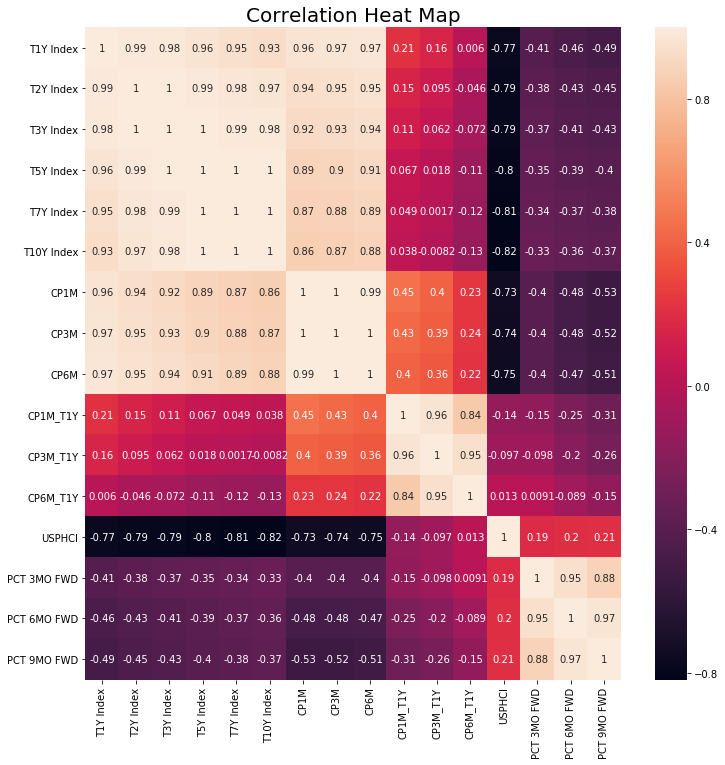

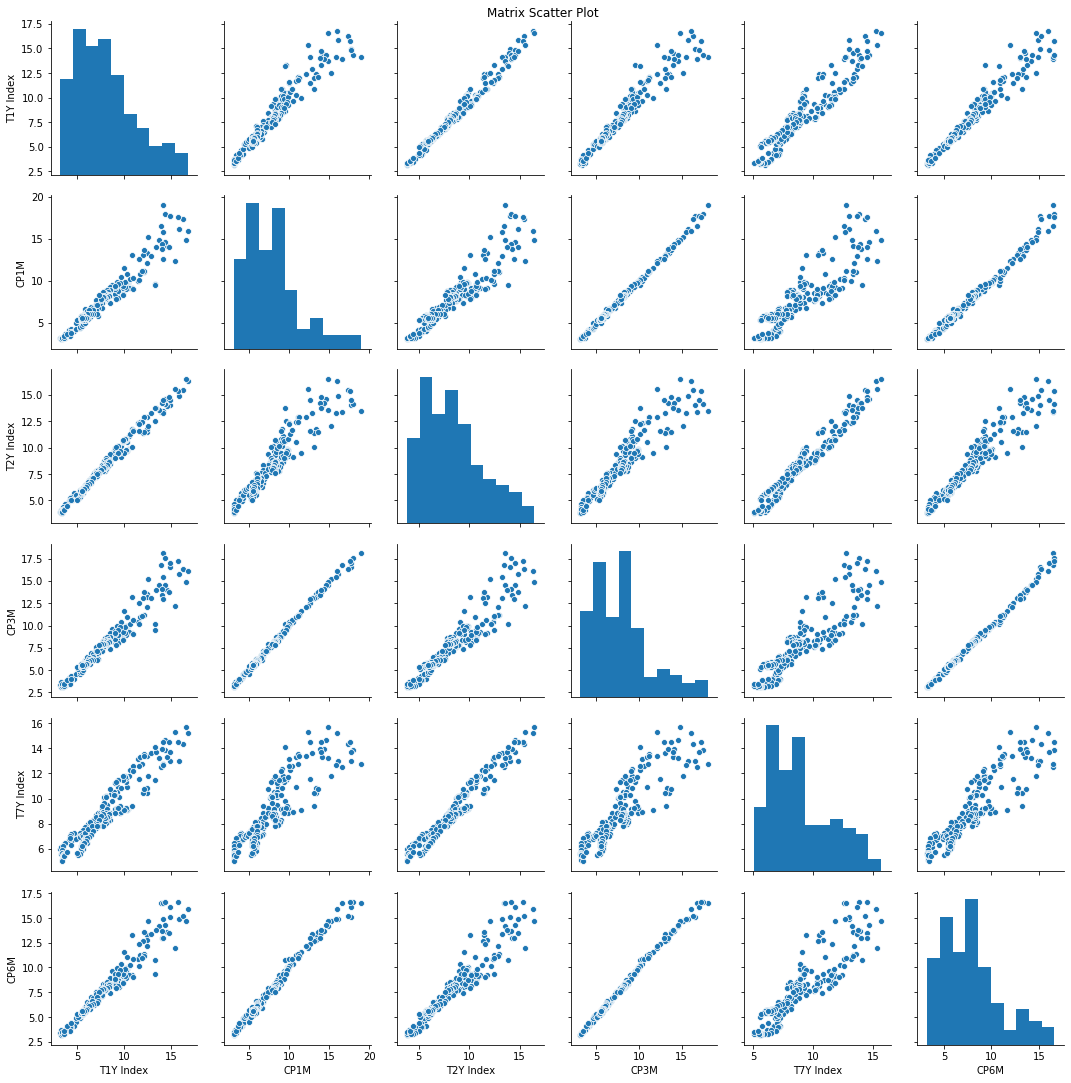

In [50]:
# Quick EDA
df.describe()
print(df.shape)
print(df.head())

# Correlation heat map using seaborn
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
plt.title('Correlation Heat Map', fontsize = 20)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Scatter plot matrix
col_names = []
for col in df.columns: 
    col_names.append(col)
    
# Based on the heat map, we slect some features to to a matrix of scater plot.
g = sns.pairplot(df, vars=["T1Y Index", "CP1M", "T2Y Index", "CP3M","T7Y Index","CP6M"])
g.fig.suptitle("Matrix Scatter Plot", y=1)

## 2) Preprocessing, feature extraction, feature selection

In [7]:
#Preprocessing, feature extraction, feature selection

#Extract Data
 # Attributes
X = df.iloc[0:,0:12]
 # Target: % Change in the index 3,6,9 months ahead
y_3 = df.iloc[0:,13]
y_6 = df.iloc[0:,14]
y_9 = df.iloc[0:,15]
usphci = df.iloc[0:,12]


# Standardize the data 
sc = StandardScaler()
X_std = sc.fit_transform(X)
 # 3 month
y_3_std = sc.fit_transform(y_3.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X_std, y_3_std, test_size = 0.1)
 # 6 month
y_6_std = sc.fit_transform(y_6.values.reshape(-1,1))
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_std, y_6_std, test_size = 0.1) 
 # 9 month
y_9_std = sc.fit_transform(y_9.values.reshape(-1,1))
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_std, y_9_std, test_size = 0.1) 
 # usphci
usphci_std = sc.fit_transform(usphci.values.reshape(-1,1))
X_train_usphci, X_test_usphci, y_train_usphci, y_test_usphci = train_test_split(X_std, usphci_std, test_size = 0.1)

svr_model = []
Linear_regression = []
Ridge_regression = []
Lasso_regression = []
KNN_regression = []

# SVR Regressor after PCA with n = 2
#clf_svr = svm.SVR(kernel='linear')
#clf_svr.fit(X_train,y_train)
#y_pred_train_SVM = clf_svr.predict(X_train)
#y_pred_test_SVM = clf_svr.predict(X_test)
#print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train,y_pred_train_SVM),r2_score(y_test, y_pred_test_SVM)))
#print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train,y_pred_train_SVM),mean_squared_error(y_test, y_pred_test_SVM)))

#pca = PCA(n_components=2)
#X_train_pca = pca.fit_transform(X_train_std)
#pca.fit(X)
#transformed = pca.transform(X)

#X_test_pca = pca_2.transform(X_test_std)

## 3) Model fitting and evaluation


----------------------------Models for % Change in the index 3 month ahead-------------------------------

SVR with polynomial kernel:
R^2 train: 0.305, test: 0.223

Linear Regression:
R^2 train: 0.218, test: 0.480

Ridge Regression:
R^2 train: 0.171, test: 0.458

Lasso Regression:
R^2 train: 0.000, test: -0.002

K-neighbors Regression:
R^2 train: 0.813, test: 0.283

------------------------------Models for % Change in the index 6 month ahead-------------------------------------

SVR with polynomial kernel:
R^2 train: 0.371, test: 0.179

Linear Regression:
R^2 train: 0.324, test: 0.064

Ridge Regression:
R^2 train: 0.286, test: 0.102

Lasso Regression:
R^2 train: 0.000, test: -0.002

K-neighbors Regression:
R^2 train: 0.841, test: 0.957

-------------------------------Models for % Change in the index 9 month ahead------------------------------------

SVR with polynomial kernel:
R^2 train: 0.399, test: 0.100

Linear Regression:
R^2 train: 0.374, test: 0.081

Ridge Regression:
R^2 train

C:\Users\timot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\timot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\timot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\timot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193:

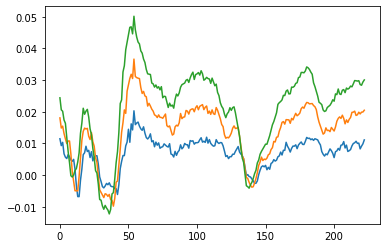

In [8]:
#------------------------------------ Models for % Change in the index 3 month ahead -------------------------------------------
print("\n----------------------------Models for % Change in the index 3 month ahead-------------------------------\n")
    # Plot of y-series
plt.plot(y_3)

 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)
y_pred_train_SVR = clf.predict(X_train)
y_pred_test_SVR = clf.predict(X_test)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train,y_pred_train_SVR),r2_score(y_test, y_pred_test_SVR)))
svr_model.append(r2_score(y_test, y_pred_test_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train,y_train_pred),r2_score(y_test, y_test_pred)))
Linear_regression.append(r2_score(y_test, y_test_pred))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
Ridge_regression.append(r2_score(y_test, y_test_pred))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
Lasso_regression.append(r2_score(y_test, y_test_pred))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
y_train_pred = neigh.predict(X_train)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
KNN_regression.append(r2_score(y_test, y_test_pred))

# ------------------------------Models for % Change in the index 6 month ahead-------------------------------------------------

print("\n------------------------------Models for % Change in the index 6 month ahead-------------------------------------\n")
    # Plot of y-series
plt.plot(y_6)

 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train_6, y_train_6)
y_pred_train_6_SVR = clf.predict(X_train_6)
y_pred_test_6_SVR = clf.predict(X_test_6)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6,y_pred_train_6_SVR),r2_score(y_test_6, y_pred_test_6_SVR)))
svr_model.append(r2_score(y_test, y_pred_test_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train_6, y_train_6)
y_test_pred_6 = reg.predict(X_test_6)
y_train_pred_6 = reg.predict(X_train_6)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6,y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
Linear_regression.append(r2_score(y_test, y_test_pred))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_6, y_train_6)
y_test_pred_6 = ridge.predict(X_test_6)
y_train_pred_6 = ridge.predict(X_train_6)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6, y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
Ridge_regression.append(r2_score(y_test, y_test_pred))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train_6, y_train_6)
y_test_pred_6 = lasso.predict(X_test_6)
y_train_pred_6 = lasso.predict(X_train_6)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6, y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
Lasso_regression.append(r2_score(y_test, y_test_pred))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_6, y_train_6)
y_test_pred_6 = neigh.predict(X_test_6)
y_train_pred_6 = neigh.predict(X_train_6)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6, y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
KNN_regression.append(r2_score(y_test, y_test_pred))

# ------------------------------Models for % Change in the index 9 month ahead-------------------------------------------------


print("\n-------------------------------Models for % Change in the index 9 month ahead------------------------------------\n")
    # Plot of y-series
plt.plot(y_9)

 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train_9, y_train_9)
y_pred_train_9_SVR = clf.predict(X_train_9)
y_pred_test_9_SVR = clf.predict(X_test_9)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9,y_pred_train_9_SVR),r2_score(y_test_9, y_pred_test_9_SVR)))
svr_model.append(r2_score(y_test, y_pred_test_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train_9, y_train_9)
y_test_pred_9 = reg.predict(X_test_9)
y_train_pred_9 = reg.predict(X_train_9)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9,y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
Linear_regression.append(r2_score(y_test, y_test_pred))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_9, y_train_9)
y_test_pred_9 = ridge.predict(X_test_9)
y_train_pred_9 = ridge.predict(X_train_9)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9, y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
Ridge_regression.append(r2_score(y_test, y_test_pred))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train_9, y_train_9)
y_test_pred_9 = lasso.predict(X_test_9)
y_train_pred_9 = lasso.predict(X_train_9)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9, y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
Lasso_regression.append(r2_score(y_test, y_test_pred))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_9, y_train_9)
y_test_pred_9 = neigh.predict(X_test_9)
y_train_pred_9 = neigh.predict(X_train_9)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9, y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
KNN_regression.append(r2_score(y_test, y_test_pred))

# ---------------------------------------------Models for USPHCI-------------------------------------------------


print("\n------------------------------------------Models for USPHCI---------------------------------------------------\n")
 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train_9, y_train_9)
y_pred_train_usphci_SVR = clf.predict(X_train_usphci)
y_pred_test_usphci_SVR = clf.predict(X_test_usphci)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci,y_pred_train_usphci_SVR),r2_score(y_test_usphci, y_pred_test_usphci_SVR)))
svr_model.append(r2_score(y_test_usphci, y_pred_test_usphci_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = reg.predict(X_test_usphci)
y_train_pred_usphci = reg.predict(X_train_usphci)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci,y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
Linear_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = ridge.predict(X_test_usphci)
y_train_pred_usphci = ridge.predict(X_train_usphci)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci, y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
Ridge_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = lasso.predict(X_test_usphci)
y_train_pred_usphci = lasso.predict(X_train_usphci)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci, y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
Lasso_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = neigh.predict(X_test_usphci)
y_train_pred_usphci = neigh.predict(X_train_usphci)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci, y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
KNN_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

## 4) Hyperparameter tuning

In [32]:
print("Average of each model perf on testing set:")
print("SVR",statistics.mean(svr_model))
print("LR",statistics.mean(Linear_regression))
print("RR",statistics.mean(Ridge_regression))
print("LR",statistics.mean(Lasso_regression))
print("KNN",statistics.mean(KNN_regression))

# Hyperparameter tunning for % Change in the index 3 month ahead
 #I will do hyperparameter tunnning on the KNN regressor since it has the best result. 
 #I don't think that it will make a big difference on KNN, as a result I decided to implement it on
 #SVR because the room for improvment is much larger.

print("\nChange in the index 3 month ahead")
 # Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train,y_train)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test,y_test))


 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train,y_train)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test,y_test))

# Hyperparameter tunning for % Change in the index 6 month ahead
print("\nChange in the index 6 month ahead")

# Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train_6,y_train_6)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test_6,y_test_6))

 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train_6,y_train_6)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test_6,y_test_6))

# Hyperparameter tunning for % Change in the index 9 month ahead
print("\nChange in the index 9 month ahead")

# Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train_9,y_train_9)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test_9,y_test_9))

 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train_9,y_train_9)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test_9,y_test_9))

# Hyperparameter tunning for USPHCI
print("\nUSPHCI prediction")

# Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train_usphci,y_train_usphci)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test_usphci,y_test_usphci))

 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train_usphci,y_train_usphci)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test_usphci,y_test_usphci))

Average of each model perf on testing set:
SVR 0.01895004465474523
LR 0.22403668906796356
RR 0.20326061493004183
LR 0.007081168244400027
KNN 0.2502191497771897

Change in the index 3 month ahead
Hyperparamter tunning SVR
Best hyperparamaters:  {'degree': 1, 'kernel': 'rbf'}
R^2 score:  0.32433297459009
SVR score on test:  0.27019229622469354

Hyperparamter tunning KNN
Best hyperparamaters:  {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
R^2 score:  0.30500139764680534
KNN score on test:  0.40854384524588505

Change in the index 6 month ahead
Hyperparamter tunning SVR
Best hyperparamaters:  {'degree': 1, 'kernel': 'rbf'}
R^2 score:  0.45525614191143066
SVR score on test:  0.42718432130148026

Hyperparamter tunning KNN
Best hyperparamaters:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
R^2 score:  0.5214706907898011
KNN score on test:  0.5839323007475938

Change in the index 9 month ahead
Hyperparamter tunning SVR
Best hyperpara

In [10]:
import warnings
warnings.filterwarnings("ignore")

## Same as above but using PCA 

       Feature  Expalined Variance PCA  Explained Variance Cumulative
0    T1Y Index                0.724998                       0.724998
1    T2Y Index                0.250494                       0.975492
2    T3Y Index                0.014457                       0.989949
3    T5Y Index                0.008467                       0.998416
4    T7Y Index                0.000728                       0.999144
5   T10Y Index                0.000573                       0.999717
6         CP1M                0.000148                       0.999865
7         CP3M                0.000088                       0.999952
8         CP6M                0.000025                       0.999977
9     CP1M_T1Y                0.000013                       0.999990
10    CP3M_T1Y                0.000008                       0.999998
11    CP6M_T1Y                0.000002                       1.000000

----------------------------Models for % Change in the index 3 month ahead---------------

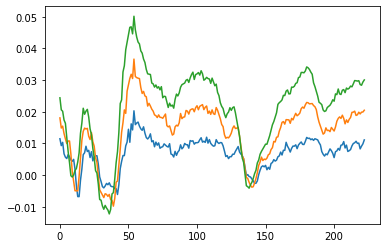

In [11]:
# PCA
pca = PCA()
# Fit the Features value to PCA
pca.fit_transform(X_std)

# Display cummulative explained variance
df_pca_result=pd.DataFrame({"Feature":list(df.iloc[0:,0:12].columns),
              "Expalined Variance PCA":pca.explained_variance_ratio_}).sort_values(
    "Expalined Variance PCA",ascending=False)
df_pca_result["Explained Variance Cumulative"]=df_pca_result["Expalined Variance PCA"].cumsum()
print(df_pca_result)

# PCA for 4 components which account for 0.998416 of the variance
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_std)

 # 3 month
y_3_std = sc.fit_transform(y_3.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_3_std, test_size = 0.1)
 # 6 month
y_6_std = sc.fit_transform(y_6.values.reshape(-1,1))
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_pca, y_6_std, test_size = 0.1) 
 # 9 month
y_9_std = sc.fit_transform(y_9.values.reshape(-1,1))
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_pca, y_9_std, test_size = 0.1) 
 # usphci
usphci_std = sc.fit_transform(usphci.values.reshape(-1,1))
X_train_usphci, X_test_usphci, y_train_usphci, y_test_usphci = train_test_split(X_pca, usphci_std, test_size = 0.1)


#Preprocessing, feature extraction, feature selection

#Extract Data
 # Attributes
X = df.iloc[0:,0:12]
 # Target: % Change in the index 3,6,9 months ahead
y_3 = df.iloc[0:,13]
y_6 = df.iloc[0:,14]
y_9 = df.iloc[0:,15]
usphci = df.iloc[0:,12]


# Standardize the data 
sc = StandardScaler()
X_std = sc.fit_transform(X)
 # 3 month
y_3_std = sc.fit_transform(y_3.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X_std, y_3_std, test_size = 0.1)
 # 6 month
y_6_std = sc.fit_transform(y_6.values.reshape(-1,1))
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_std, y_6_std, test_size = 0.1) 
 # 9 month
y_9_std = sc.fit_transform(y_9.values.reshape(-1,1))
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_std, y_9_std, test_size = 0.1) 
 # usphci
usphci_std = sc.fit_transform(usphci.values.reshape(-1,1))
X_train_usphci, X_test_usphci, y_train_usphci, y_test_usphci = train_test_split(X_std, usphci_std, test_size = 0.1)

svr_model = []
Linear_regression = []
Ridge_regression = []
Lasso_regression = []
KNN_regression = []

#------------------------------------ Models for % Change in the index 3 month ahead -------------------------------------------
print("\n----------------------------Models for % Change in the index 3 month ahead-------------------------------\n")
    # Plot of y-series
plt.plot(y_3)

 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)
y_pred_train_SVR = clf.predict(X_train)
y_pred_test_SVR = clf.predict(X_test)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train,y_pred_train_SVR),r2_score(y_test, y_pred_test_SVR)))
svr_model.append(r2_score(y_test, y_pred_test_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train,y_train_pred),r2_score(y_test, y_test_pred)))
Linear_regression.append(r2_score(y_test, y_test_pred))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
Ridge_regression.append(r2_score(y_test, y_test_pred))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
Lasso_regression.append(r2_score(y_test, y_test_pred))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
y_train_pred = neigh.predict(X_train)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
KNN_regression.append(r2_score(y_test, y_test_pred))

# ------------------------------Models for % Change in the index 6 month ahead-------------------------------------------------

print("\n------------------------------Models for % Change in the index 6 month ahead-------------------------------------\n")
    # Plot of y-series
plt.plot(y_6)

 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train_6, y_train_6)
y_pred_train_6_SVR = clf.predict(X_train_6)
y_pred_test_6_SVR = clf.predict(X_test_6)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6,y_pred_train_6_SVR),r2_score(y_test_6, y_pred_test_6_SVR)))
svr_model.append(r2_score(y_test, y_pred_test_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train_6, y_train_6)
y_test_pred_6 = reg.predict(X_test_6)
y_train_pred_6 = reg.predict(X_train_6)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6,y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
Linear_regression.append(r2_score(y_test, y_test_pred))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_6, y_train_6)
y_test_pred_6 = ridge.predict(X_test_6)
y_train_pred_6 = ridge.predict(X_train_6)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6, y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
Ridge_regression.append(r2_score(y_test, y_test_pred))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train_6, y_train_6)
y_test_pred_6 = lasso.predict(X_test_6)
y_train_pred_6 = lasso.predict(X_train_6)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6, y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
Lasso_regression.append(r2_score(y_test, y_test_pred))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_6, y_train_6)
y_test_pred_6 = neigh.predict(X_test_6)
y_train_pred_6 = neigh.predict(X_train_6)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_6, y_train_pred_6),r2_score(y_test_6, y_test_pred_6)))
KNN_regression.append(r2_score(y_test, y_test_pred))

# ------------------------------Models for % Change in the index 9 month ahead-------------------------------------------------


print("\n-------------------------------Models for % Change in the index 9 month ahead------------------------------------\n")
    # Plot of y-series
plt.plot(y_9)

 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train_9, y_train_9)
y_pred_train_9_SVR = clf.predict(X_train_9)
y_pred_test_9_SVR = clf.predict(X_test_9)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9,y_pred_train_9_SVR),r2_score(y_test_9, y_pred_test_9_SVR)))
svr_model.append(r2_score(y_test, y_pred_test_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train_9, y_train_9)
y_test_pred_9 = reg.predict(X_test_9)
y_train_pred_9 = reg.predict(X_train_9)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9,y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
Linear_regression.append(r2_score(y_test, y_test_pred))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_9, y_train_9)
y_test_pred_9 = ridge.predict(X_test_9)
y_train_pred_9 = ridge.predict(X_train_9)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9, y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
Ridge_regression.append(r2_score(y_test, y_test_pred))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train_9, y_train_9)
y_test_pred_9 = lasso.predict(X_test_9)
y_train_pred_9 = lasso.predict(X_train_9)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9, y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
Lasso_regression.append(r2_score(y_test, y_test_pred))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_9, y_train_9)
y_test_pred_9 = neigh.predict(X_test_9)
y_train_pred_9 = neigh.predict(X_train_9)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_9, y_train_pred_9),r2_score(y_test_9, y_test_pred_9)))
KNN_regression.append(r2_score(y_test, y_test_pred))

# ---------------------------------------------Models for USPHCI-------------------------------------------------


print("\n------------------------------------------Models for USPHCI---------------------------------------------------\n")
 # SVR model
clf = svm.SVR(kernel='poly')
clf.fit(X_train_9, y_train_9)
y_pred_train_usphci_SVR = clf.predict(X_train_usphci)
y_pred_test_usphci_SVR = clf.predict(X_test_usphci)
print("SVR with polynomial kernel:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci,y_pred_train_usphci_SVR),r2_score(y_test_usphci, y_pred_test_usphci_SVR)))
svr_model.append(r2_score(y_test_usphci, y_pred_test_usphci_SVR))

 # Linear Regression
reg = LinearRegression()
reg.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = reg.predict(X_test_usphci)
y_train_pred_usphci = reg.predict(X_train_usphci)
print("\nLinear Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci,y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
Linear_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

 # Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = ridge.predict(X_test_usphci)
y_train_pred_usphci = ridge.predict(X_train_usphci)
print("\nRidge Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci, y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
Ridge_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

 # Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = lasso.predict(X_test_usphci)
y_train_pred_usphci = lasso.predict(X_train_usphci)
print("\nLasso Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci, y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
Lasso_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

 # K-neighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train_usphci, y_train_usphci)
y_test_pred_usphci = neigh.predict(X_test_usphci)
y_train_pred_usphci = neigh.predict(X_train_usphci)
print("\nK-neighbors Regression:")
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train_usphci, y_train_pred_usphci),r2_score(y_test_usphci, y_test_pred_usphci)))
KNN_regression.append(r2_score(y_test_usphci, y_test_pred_usphci))

In [30]:
# Hyper parametertuning
print("Average of each model perf on testing set:")
print("SVR",statistics.mean(svr_model))
print("LR",statistics.mean(Linear_regression))
print("RR",statistics.mean(Ridge_regression))
print("LR",statistics.mean(Lasso_regression))
print("KNN",statistics.mean(KNN_regression))

# Hyperparameter tunning for % Change in the index 3 month ahead
 #I will do hyperparameter tunnning on the KNN regressor since it has the best result. 
 #I don't think that it will make a big difference on KNN, as a result I decided to implement it on
 #SVR because the room for improvment is much larger.

print("\nChange in the index 3 month ahead")
 # Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train,y_train)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test,y_test))


 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train,y_train)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test,y_test))


# Hyperparameter tunning for % Change in the index 6 month ahead
print("\nChange in the index 6 month ahead")

# Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train_6,y_train_6)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test_6,y_test_6))

 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train_6,y_train_6)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test_6,y_test_6))

# Hyperparameter tunning for % Change in the index 9 month ahead
print("\nChange in the index 9 month ahead")

# Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train_9,y_train_9)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test_9,y_test_9))

 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train_9,y_train_9)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test_9,y_test_9))

# Hyperparameter tunning for USPHCI
print("\nUSPHCI prediction")

# Grid search on svr
params_svr = {'kernel':['linear','poly','rbf','sigmoid'],
             'degree':[1,2,3,4,5,6,7,8,9]
             }
clf = svm.SVR()
grid_svr = GridSearchCV(estimator=clf,
                      param_grid =params_svr,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_svr = grid_svr.fit(X_train_usphci,y_train_usphci)
print("Hyperparamter tunning SVR")
print("Best hyperparamaters: ", grid_svr.best_params_)
print("R^2 score: ",grid_svr.best_score_)
print("SVR score on test: ", grid_svr.best_estimator_.score(X_test_usphci,y_test_usphci))

 # Grid search on KNN(Regressor)
params_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,50,100],
             'weights':['uniform','distance'],
              'p': [1,2],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']
             }
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(estimator=knn,
                      param_grid =params_knn,
                      cv=10,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_knn = grid_knn.fit(X_train_usphci,y_train_usphci)
print("\nHyperparamter tunning KNN")
print("Best hyperparamaters: ", grid_knn.best_params_)
print("R^2 score: ",grid_knn.best_score_)
print("KNN score on test: ", grid_knn.best_estimator_.score(X_test_usphci,y_test_usphci))

Average of each model perf on testing set:
SVR 0.01895004465474523
LR 0.22403668906796356
RR 0.20326061493004183
LR 0.007081168244400027
KNN 0.2502191497771897

Change in the index 3 month ahead
Hyperparamter tunning SVR
Best hyperparamaters:  {'degree': 1, 'kernel': 'rbf'}
R^2 score:  0.32433297459009
SVR score on test:  0.27019229622469354

Hyperparamter tunning KNN
Best hyperparamaters:  {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
R^2 score:  0.30500139764680534
KNN score on test:  0.40854384524588505

Change in the index 6 month ahead
Hyperparamter tunning SVR
Best hyperparamaters:  {'degree': 1, 'kernel': 'rbf'}
R^2 score:  0.45525614191143066
SVR score on test:  0.42718432130148026

Hyperparamter tunning KNN
Best hyperparamaters:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
R^2 score:  0.5214706907898011
KNN score on test:  0.5839323007475938

Change in the index 9 month ahead
Hyperparamter tunning SVR
Best hyperpara

## Part 5: Ensembling

In [37]:
# ----------------------------------------------------Random Forest------------------------------------------------------------
# Grid search on Random Forest
params_rf = {'n_estimators': [10,100,200,500],
            'bootstrap': ['True', 'False'],
            'criterion': ['mse','mae'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

rf = RandomForestRegressor()
grid_rf = GridSearchCV(estimator=rf,
                      param_grid =params_rf,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_rf = grid_rf.fit(X_train,y_train)
print("Hyperparamter tunning Random Forest 3 month")
print("Best hyperparamaters: ", grid_rf.best_params_)
print("R^2 score: ",grid_rf.best_score_)
print("Random Forest score on test: ", grid_rf.best_estimator_.score(X_test,y_test))

# Grid search on Random Forest
params_rf = {'n_estimators': [10,100,200,500],
            'bootstrap': ['True', 'False'],
            'criterion': ['mse','mae'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

rf = RandomForestRegressor()
grid_rf = GridSearchCV(estimator=rf,
                      param_grid =params_rf,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_rf = grid_rf.fit(X_train_6,y_train_6)
print("\nHyperparamter tunning Random Forest 6 month")
print("Best hyperparamaters: ", grid_rf.best_params_)
print("R^2 score: ",grid_rf.best_score_)
print("Random Forest score on test: ", grid_rf.best_estimator_.score(X_train_6,y_train_6))

# Grid search on Random Forest
params_rf = {'n_estimators': [10,100,200,500],
            'bootstrap': ['True', 'False'],
            'criterion': ['mse','mae'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

rf = RandomForestRegressor()
grid_rf = GridSearchCV(estimator=rf,
                      param_grid =params_rf,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_rf = grid_rf.fit(X_train_9,y_train_9)
print("\nHyperparamter tunning Random Forest 9 month")
print("Best hyperparamaters: ", grid_rf.best_params_)
print("R^2 score: ",grid_rf.best_score_)
print("Random Forest score on test: ", grid_rf.best_estimator_.score(X_train_9,y_train_9))

# Grid search on Random Forest
params_rf = {'n_estimators': [10,100,200,500],
            'bootstrap': ['True', 'False'],
            'criterion': ['mse','mae'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

rf = RandomForestRegressor()
grid_rf = GridSearchCV(estimator=rf,
                      param_grid =params_rf,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)

grid_rf = grid_rf.fit(X_train_usphci,y_train_usphci)
print("\nHyperparamter tunning Random Forest USIPH")
print("Best hyperparamaters: ", grid_rf.best_params_)
print("R^2 score: ",grid_rf.best_score_)
print("Random Forest score on test: ", grid_rf.best_estimator_.score(X_test_usphci,y_test_usphci))
#------------------------------------------------------Gradient Boosting--------------------------------------------------------


Hyperparamter tunning Random Forest 3 month
Best hyperparamaters:  {'bootstrap': 'False', 'criterion': 'mse', 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 10}
R^2 score:  0.2520201798732717
Random Forest score on test:  0.115079603084976

Hyperparamter tunning Random Forest 6 month
Best hyperparamaters:  {'bootstrap': 'True', 'criterion': 'mse', 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 10}
R^2 score:  0.3882397021596434
Random Forest score on test:  0.5425332004716756

Hyperparamter tunning Random Forest 9 month
Best hyperparamaters:  {'bootstrap': 'True', 'criterion': 'mse', 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 100}
R^2 score:  0.5103518834629248
Random Forest score on test:  0.5600647671808094

Hyperparamter tunning Random Forest USIPH
Best hyperparamaters:  {'bootstrap': 'False', 'criterion': 'mae', 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 10}
R^2 score:  0.8077753041786404
Random Forest 

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
params_gb = {'n_estimators': [10,100,200,500],
            'criterion': ['mae','friedman_mse'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

gb = GradientBoostingRegressor()

grid_gb = GridSearchCV(estimator=gb,
                      param_grid =params_gb,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)


# Fit gb to the training set
grid_gb = grid_gb.fit(X_train,y_train)

# Predict test set labels
print("Best hyperparamaters: ", grid_gb.best_params_)
print("R^2 score: ",grid_gb.best_score_)
print("Gradient Boosting score on test: ", grid_gb.best_estimator_.score(X_test,y_test))
#---------------------------------------6 Months---------------------------------------
params_gb = {'n_estimators': [10,100,200,500],
            'criterion': ['mae','friedman_mse'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

gb = GradientBoostingRegressor()

grid_gb = GridSearchCV(estimator=gb,
                      param_grid =params_gb,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)


# Fit gb to the training set
grid_gb = grid_gb.fit(X_train_6,y_train_6)

# Predict test set labels
print("Best hyperparamaters: ", grid_gb.best_params_)
print("R^2 score: ",grid_gb.best_score_)
print("Gradient Boosting score on test: ", grid_gb.best_estimator_.score(X_test_6,y_test_6))
#-------------------------------------------------------------9 month------------------------------------------
params_gb = {'n_estimators': [10,100,200,500],
            'criterion': ['mae','friedman_mse'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

gb = GradientBoostingRegressor()

grid_gb = GridSearchCV(estimator=gb,
                      param_grid =params_gb,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)


# Fit gb to the training set
grid_gb = grid_gb.fit(X_train_9,y_train_9)

# Predict test set labels
print("Best hyperparamaters: ", grid_gb.best_params_)
print("R^2 score: ",grid_gb.best_score_)
print("Gradient Boosting score on test: ", grid_gb.best_estimator_.score(X_test_9,y_test_9))

#-------------------------------------------------------------USCHPI------------------------------------------
params_gb = {'n_estimators': [10,100,200,500],
            'criterion': ['mae','friedman_mse'],
            'min_samples_leaf' : [0.1,.12,.15, 0.2],
             'max_features': ['log2','sqrt']}

gb = GradientBoostingRegressor()

grid_gb = GridSearchCV(estimator=gb,
                      param_grid =params_gb,
                      cv=5,
                      scoring = 'r2',
                      n_jobs=-1,
                      return_train_score=True)


# Fit gb to the training set
grid_gb = grid_gb.fit(X_train_usphci,y_train_usphci)

# Predict test set labels
print("Best hyperparamaters: ", grid_gb.best_params_)
print("R^2 score: ",grid_gb.best_score_)
print("Gradient Boosting score on test: ", grid_gb.best_estimator_.score(X_test_usphci,y_test_usphci))

Best hyperparamaters:  {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'min_samples_leaf': 0.12, 'n_estimators': 500}
R^2 score:  0.38267740049192056
Gradient Boosting score on test:  0.34188421652086776
Best hyperparamaters:  {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'n_estimators': 500}
R^2 score:  0.45956074815424885
Gradient Boosting score on test:  0.6479066767133318
Best hyperparamaters:  {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'n_estimators': 200}
R^2 score:  0.6315716749114497
Gradient Boosting score on test:  0.6389476410044417
Best hyperparamaters:  {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'n_estimators': 500}
R^2 score:  0.8824505193850656
Gradient Boosting score on test:  0.8192109591452771
